<a href="https://colab.research.google.com/github/wrenheiligenstein/GLY6932FinalProject/blob/main/GeologyFinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import sklearn as sklearn
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [2]:
#read in data
url = "https://raw.githubusercontent.com/wrenheiligenstein/GLY6932FinalProject/refs/heads/main/STEMvsHumanities.csv"
df = pd.read_csv(url)
#df = pd.read_csv('STEMvsHumanities.csv')

In [3]:
#check
df

,Timestamp,What type of program are you in?,How happy are you in your program on a scale from 1-10?,You prefer cats over dogs.,You find factual arguments more persuasive than what resonates emotionally with you.,You can easily stay calm under pressure.,You keep your spaces clean and organized.,You enjoy spending time out in nature.,You like to participate in team-based activities.,You prioritize being sensitive to other’s feelings over being completely honest.,You like to go out on the weekends.,You often second-guess the choices that you have made.,Others often describe you as lively and outgoing.,You would describe yourself as a picky eater.,You prefer being around others rather than spending time on your own.,You like to use schedules and lists to stay organized.,You often experience quick shifts in your mood.,You enjoy exploring unfamiliar viewpoints.,You can easily connect with people you have just met.,Leave you name! (optional)
0,3/6/2025 12:23:58,"STEM (science, technology, engineering, mathem...",7,4,3,4,4,2,4,4,2,3,2,4,2,4,2,4,4,Alyssa
1,3/6/2025 12:24:30,"STEM (science, technology, engineering, mathem...",7,2,3,4,2,5,4,3,5,4,5,2,5,5,4,5,4,wren
2,3/6/2025 12:28:06,"STEM (science, technology, engineering, mathem...",8,4,4,3,3,4,2,4,4,4,3,4,3,4,4,3,3,the babadook
3,3/6/2025 12:32:32,"STEM (science, technology, engineering, mathem...",6,1,4,4,1,5,3,2,2,2,1,5,2,3,2,4,2,NaN
4,3/6/2025 12:32:48,"STEM (science, technology, engineering, mathem...",7,4,4,3,4,4,3,5,5,4,4,1,4,5,3,5,3,"Its a me, Zoe :)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,3/12/2025 14:30:05,"Humanities (english, psychology, political sci...",8,5,5,5,5,3,1,3,2,3,1,1,3,5,3,3,3,NaN
60,3/12/2025 15:04:21,"STEM (science, technology, engineering, mathem...",9,4,4,3,4,4,3,4,4,4,2,4,2,3,4,2,2,Ray
61,3/12/2025 15:06:11,"Humanities (english, psychology, political sci...",7,4,5,4,2,5,4,3,4,1,4,3,4,5,5,4,3,NaN
62,3/12/2025 15:08:21,"STEM (science, technology, engineering, mathem...",9,5,3,4,2,4,4,4,4,5,3,1,3,4,4,4,3,Andrea


In [4]:
#removing unnecessary columns and cutting lower happiness ratings
df.drop('Timestamp', axis=1, inplace=True)
df.drop('Leave you name! (optional)', axis=1, inplace=True)

df_happy = df[df['How happy are you in your program on a scale from 1-10?'] >= 8]
df_happy = df_happy.drop(['How happy are you in your program on a scale from 1-10?'], axis=1)

df_happy2 = df_happy.drop(['What type of program are you in?'], axis=1)

In [5]:
#transforming data using Principal Component Analysis
df2norm = (df_happy2 - np.mean(df_happy2, axis = 0))/np.std(df_happy2, axis = 0)

pca = PCA()
pca.fit(df2norm)

PCs = pca.fit_transform(df2norm)

In [6]:
#check
pca.explained_variance_ratio_

array([0.22477551, 0.15458101, 0.1134742 , 0.09295279, 0.08212831,
       0.06598585, 0.05929597, 0.0428953 , 0.04163194, 0.03086695,
       0.02563244, 0.02066402, 0.01843203, 0.01367636, 0.00896897,
       0.00403836])

In [7]:
#determining number of PCAs that account for 90% of variance
sum = 0
count = 0
for i in pca.explained_variance_ratio_:
    if sum<= 0.9:
      sum += i
      count += 1

print(count)
print(sum)

10
0.9085878303290358


In [8]:
#shortening column names
df_happy.replace('STEM (science, technology, engineering, mathematics, etc.)', 'STEM', inplace=True)
df_happy.replace('Humanities (english, psychology, political science, history, the arts, linguistics, etc.)','Humanities', inplace=True)

In [9]:
#splittinf data into testing and training
Pcs_train, Pcs_test, Program_train, Program_test = train_test_split(PCs[:,:10], df_happy['What type of program are you in?'], test_size = 0.2, shuffle = True)

In [10]:
#fitting logistic regression
regress = LogisticRegression(class_weight='balanced')
regress.fit(Pcs_train, Program_train)

LogisticRegression(class_weight='balanced')

In [11]:
#refitting logistic regression with different splits to get average accuracy and f1 score
accuracy_list = []
f1_list = []
for i in range(200):
  Pcs_train, Pcs_test, Program_train, Program_test = train_test_split(PCs[:,:10], df_happy['What type of program are you in?'], test_size = 0.2, shuffle = True)
  regress = LogisticRegression(class_weight='balanced')
  #regress = LogisticRegression()
  regress.fit(Pcs_train, Program_train)

  y_pred = regress.predict(Pcs_test)
  y_true = Program_test
  accuracy_list.append(metrics.accuracy_score(y_true, y_pred))
  f1_list.append(sklearn.metrics.f1_score(y_true, y_pred, pos_label='STEM'))

average_accuracy = np.sum(accuracy_list)/len(accuracy_list)
print(average_accuracy)
average_f1 = np.sum(f1_list)/len(f1_list)
print(average_f1)


0.65875
0.7648684093684094


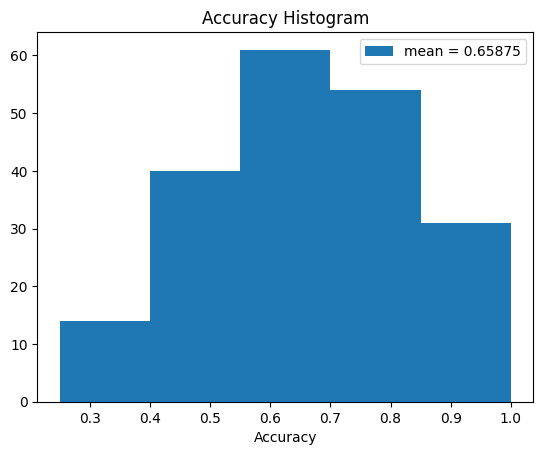

In [12]:
plt.hist(accuracy_list, bins=5, label='mean = ' + str(average_accuracy))
plt.title('Accuracy Histogram')
plt.xlabel('Accuracy')
plt.legend()

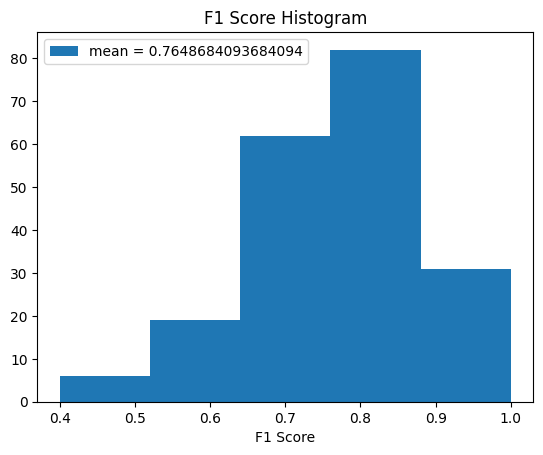

In [13]:
plt.hist(f1_list, bins=5, label='mean = ' + str(average_f1))
plt.title('F1 Score Histogram')
plt.xlabel('F1 Score')
plt.legend()

In [14]:
#getting accuracy and f1 score for last sample
y_pred = regress.predict(Pcs_test)
y_true = Program_test

print(metrics.accuracy_score(y_true, y_pred))
print(sklearn.metrics.f1_score(y_true, y_pred, pos_label='STEM'))

0.875
0.9230769230769231


In [15]:
def program_quiz():
  print('Answer the questions on a scale of 1 to 5, 1 meaning you disagree completely and 5 meaning you agree completely.')
  answers = []
  answers.append(int(input('You prefer cats over dogs.')))
  answers.append(int(input('You find factual arguments more persuasive than what resonates emotionally with you.')))
  answers.append(int(input('You can easily stay calm under pressure.')))
  answers.append(int(input('You keep your spaces clean and organized.')))
  answers.append(int(input('You enjoy spending time out in nature.')))
  answers.append(int(input('You like to participate in team-based activities.')))
  answers.append(int(input('You prioritize being sensitive to other’s feelings over being completely honest.')))
  answers.append(int(input('You like to go out on the weekends.')))
  answers.append(int(input('You often second-guess the choices that you have made.')))
  answers.append(int(input('Others often describe you as lively and outgoing.')))
  answers.append(int(input('You would describe yourself as a picky eater.')))
  answers.append(int(input('You prefer being around others rather than spending time on your own.')))
  answers.append(int(input('You like to use schedules and lists to stay organized.')))
  answers.append(int(input('You often experience quick shifts in your mood.')))
  answers.append(int(input('You enjoy exploring unfamiliar viewpoints.')))
  answers.append(int(input('You can easily connect with people you have just met.')))

  #transforming answers into principal components
  answers2 = (np.array(answers)).reshape(-1,1)
  PCanswers = pca.fit_transform(answers2)
  PCanswers = PCanswers.reshape(1,-1)
  #predicting program
  print(regress.predict(PCanswers[:,:10]))


In [16]:
program_quiz()

Answer the questions on a scale of 1 to 5, 1 meaning you disagree completely and 5 meaning you agree completely.
You prefer cats over dogs.1
You find factual arguments more persuasive than what resonates emotionally with you.4
You can easily stay calm under pressure.4
You keep your spaces clean and organized.2
You enjoy spending time out in nature.5
You like to participate in team-based activities.4
You prioritize being sensitive to other’s feelings over being completely honest.3
You like to go out on the weekends.5
You often second-guess the choices that you have made.3
Others often describe you as lively and outgoing.5
You would describe yourself as a picky eater.1
You prefer being around others rather than spending time on your own.4
You like to use schedules and lists to stay organized.5
You often experience quick shifts in your mood.5
You enjoy exploring unfamiliar viewpoints.5
You can easily connect with people you have just met.4
['STEM']
